In [1]:
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [3]:
from evaluate_monthly_sales_target import simulate_monthly_sales, target_met_frequency

In [4]:
def do_simulation(starting_date, target, sales_mean, sales_stddev, iterations=2000, weekend_effect=1, plot_graphs=True):
    sales = simulate_monthly_sales(
        sales_mean, sales_stddev, starting_date, iterations=iterations, weekend_effect=weekend_effect
    )
    
    if plot_graphs:
        for sales_simulation in sales:
            x_labels = range(len(sales_simulation))
            plt.plot(x_labels, sales_simulation)

        plt.xlabel("Days")
        plt.ylabel("Sales, $")
        plt.ylim((0,target*2))
        
        target_met = target_met_frequency(sales, target)
        plt.title(u"Cumulative sales amount, starting from {starting}. μ=${mean:.2f}, SD={stddev:.2f}, weekend multiplier={weekend}.\nTarget: ${target}, target met: {target_met:.2f}%".format(
            starting=starting_date,
            mean=sales_mean,
            stddev=sales_stddev,
            weekend=weekend_effect,
            target=target,
            target_met=target_met*100
        ))

        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
    
    return sales

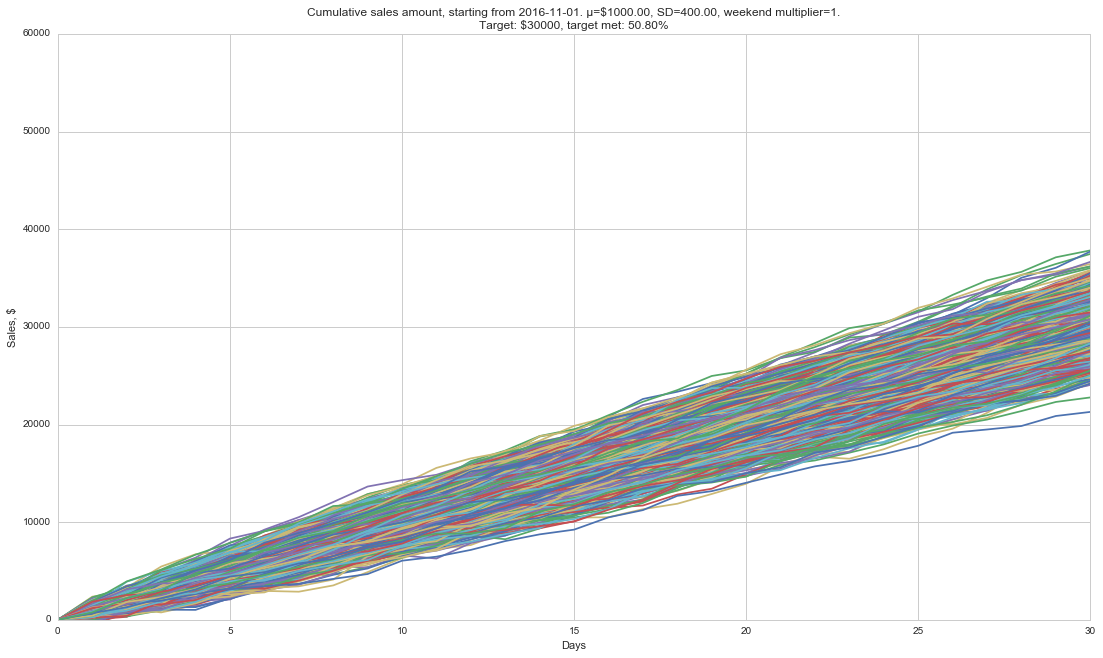

In [5]:
sales = do_simulation("2016-11-01", 30000, 1000, 400)

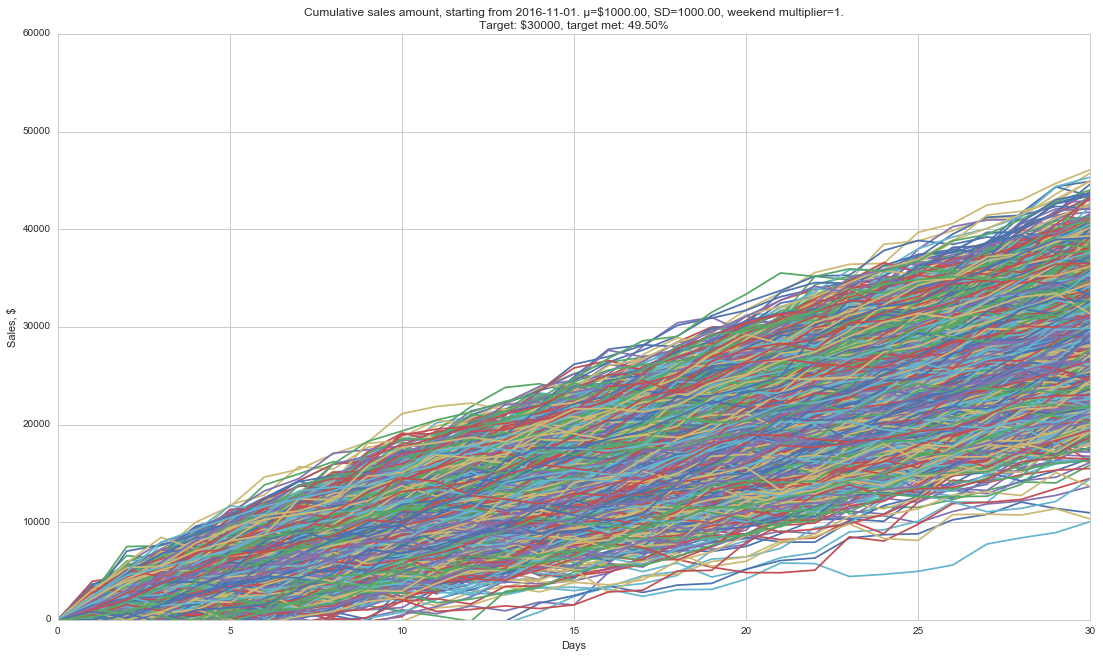

In [6]:
sales = do_simulation("2016-11-01", 30000, 1000, 1000)

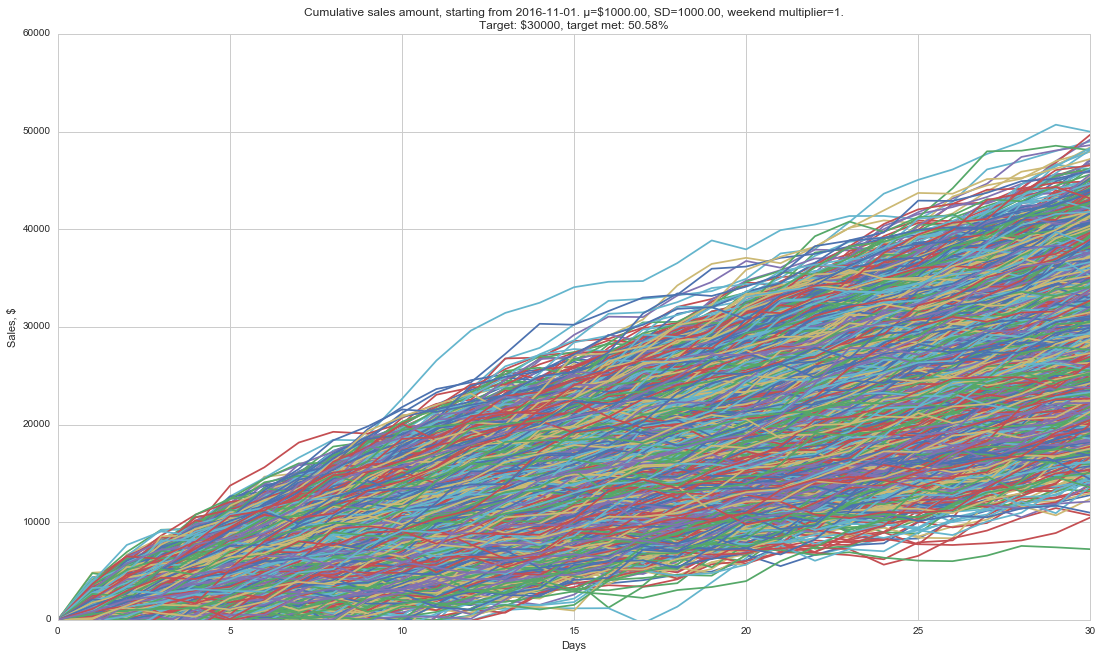

In [7]:
sales = do_simulation("2016-11-01", 30000, 1000, 1000, iterations=10000)

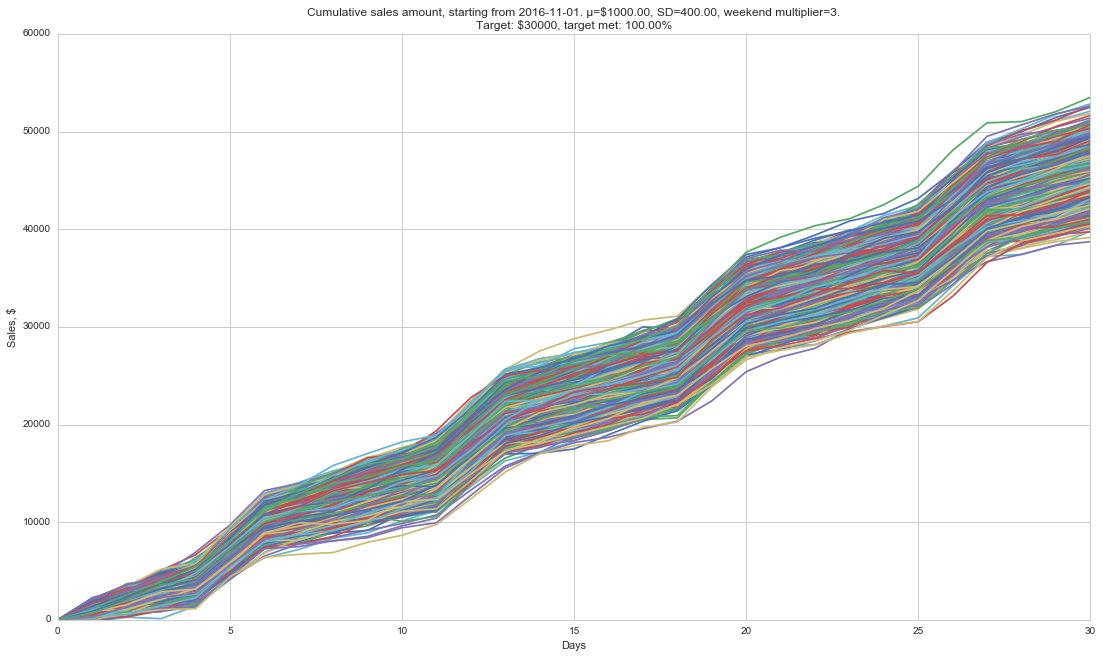

In [8]:
sales = do_simulation("2016-11-01", 30000, 1000, 400, weekend_effect=3)

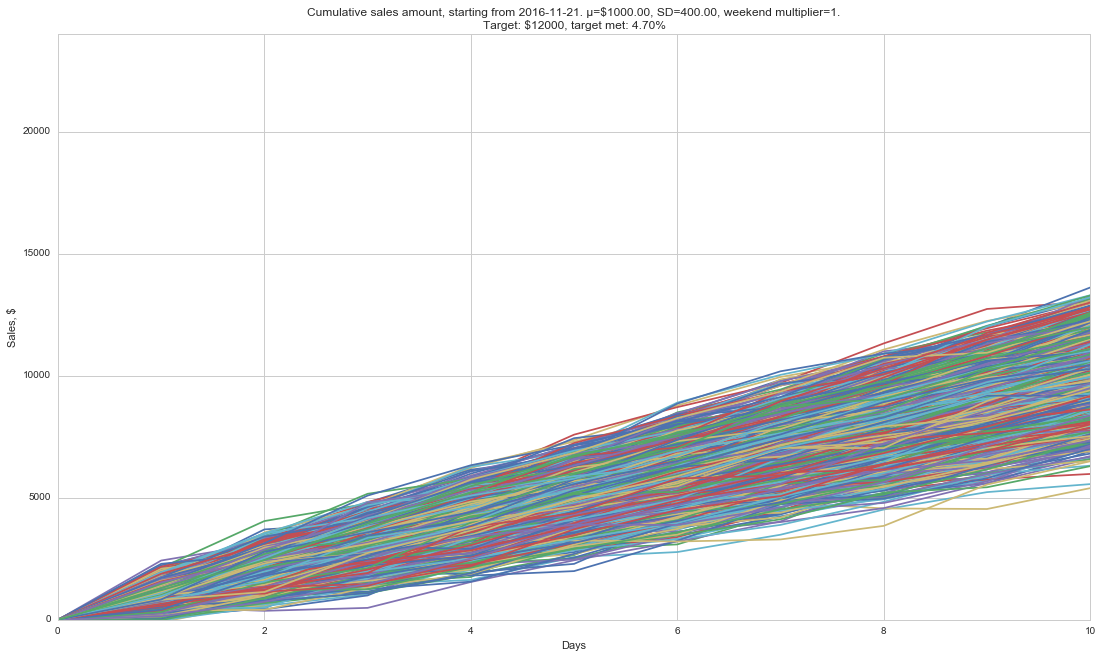

In [9]:
sales = do_simulation("2016-11-21", 12000, 1000, 400)